# Comparing different classifications models on a single dataset



# Importing Libraries and Data



In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

import warnings as wrn
wrn.filterwarnings('ignore')

In [20]:
# Importing Data Using Pandas
data = pd.read_csv("https://github.com/robitussin/CCMACLRL/blob/b5b6d733c324f84d038141b464d1746fab4cb794/9%20-%20Ensemble%20Learning%20and%20Random%20Forest/implementation/column_2C_weka.csv?raw=True")

I've imported two labeled data because I want to use Logistic Regression

# Having Idea About Data

In [21]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [22]:
data.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


* Our data does not have any NaN values so we will not fill NaN values
* Our label is object, we have to convert it to int64
* There are only 6 features in our dataset.

# Data Preprocessing for Machine Learning

In this section I am going to prepare data for machine learning. In order to do this I am going to follow these steps.

* Converting Label to Int64
* Splitting Data

Let's start.


## Converting Label to Int64

Maybe, you remember. There are two labels in our dataset. They are:
* Normal
* Abnormal

I am going to convert *Normal* to 1 and *Abnormal* to 0. In order to do this I am going to use list comprehension

(Python is really usefull language :D )

In [24]:
data["class"] = [1 if each == "Normal" else 0 for each in data["class"]]

In [25]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [26]:
data.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,1


## Splitting Data

In this section I am going to split data into two pieces. Train and test. In order to do this I am going to use SKLearn library's Train Test Split Function. Let's do this!

In [29]:
from sklearn.model_selection import train_test_split
x = data.drop("class",axis=1)
y = data["class"]

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.3)

- Our train and test splits are ready, we are ready to train some machine learning features!

# Machine Learning Algorithms

In this section we are going to train different machine learning algorithms and at the final of this section we are going to compare accuracy scores. Let's start with KNN

## KNN Classification


In [31]:
score_list = {} # I've created this dict for saving score variables into it

In [32]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=22) #I've tried more than 50 values. 22 is the best value

KNN.fit(x_train,y_train)
knn_score = KNN.score(x_test,y_test)
score_list["KNN Classifier"] = knn_score
print(f"Score is {knn_score}")


Score is 0.8709677419354839


Our first algorithm's score is 81%. I think it is a bit low, but not bad.

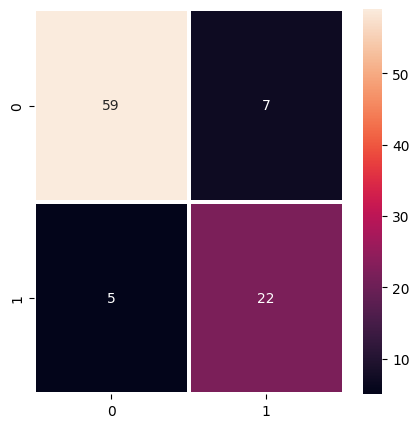

array([[59,  7],
       [ 5, 22]])

In [33]:
y_true = y_test
y_pred = KNN.predict(x_test)
plot_confusionMatrix(y_true,y_pred)

## Logistic Regression



In [34]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)

lr_score = LR.score(x_test,y_test)
score_list["Logistic Regression"] = lr_score

print(f"Score is {lr_score}")

Score is 0.8709677419354839


* Our logistic regression score is 74%

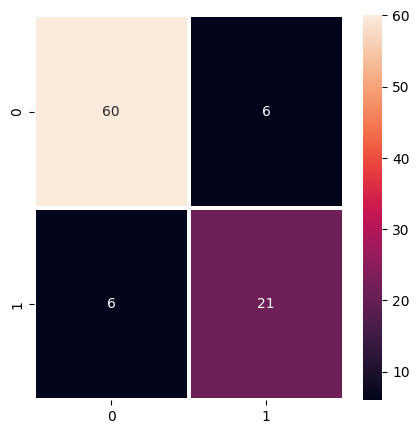

array([[60,  6],
       [ 6, 21]])

In [35]:
y_pred = LR.predict(x_test)
plot_confusionMatrix(y_true,y_pred)

## Support Vector Machine Classification


In [36]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
svc_score = svc.score(x_test,y_test)
score_list["SVC"] = svc_score
print(f"Score is {svc_score}")

Score is 0.8494623655913979


* Our SVC score is 80%. This is better than Logistic Regression Score

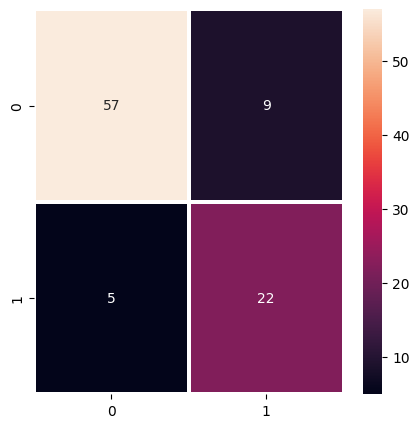

array([[57,  9],
       [ 5, 22]])

In [37]:
y_true = y_test
y_pred = svc.predict(x_test)
plot_confusionMatrix(y_true,y_pred)

## Naive Bayes Classification



In [38]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(x_train,y_train)
nbc_score = nbc.score(x_test,y_test)
score_list["GaussianNBC"] = nbc_score

print(f"Score is {nbc_score}")

Score is 0.8172043010752689


* Our score is 81%. It is very similar to our KNN score

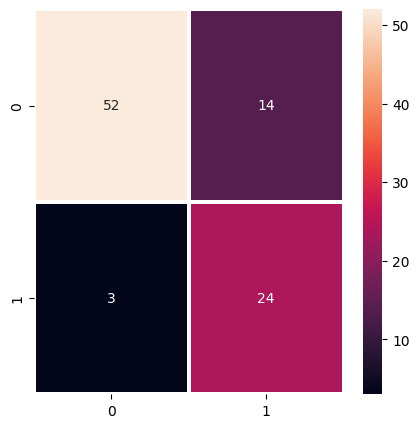

array([[52, 14],
       [ 3, 24]])

In [39]:
y_true = y_test
y_pred = nbc.predict(x_test)
plot_confusionMatrix(y_true,y_pred)

## Decision Tree Classification

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(x_train,y_train)

dtc_score = dtc.score(x_test,y_test)
score_list["DTC"] = dtc_score
print(f"Score is {dtc_score}")

Score is 0.7849462365591398


Our score is 78%. Although our score is low, it is still better than Logistic Regression score

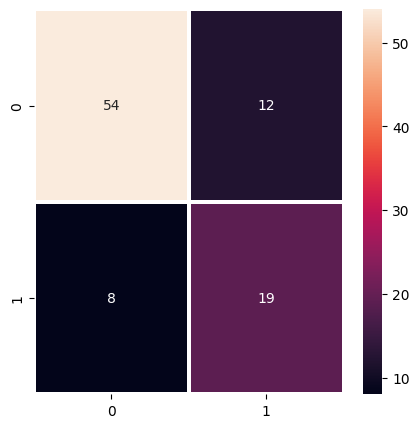

array([[54, 12],
       [ 8, 19]])

In [41]:
y_true = y_test
y_pred = dtc.predict(x_test)
plot_confusionMatrix(y_true,y_pred)

## Random Forest Classification

In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50,random_state=1)
rfc.fit(x_train,y_train)
rfc_score = rfc.score(x_test,y_test)
score_list["RFC"]=rfc_score

print(f"Score is {rfc_score}")

Score is 0.8709677419354839


* Finally! Our score is 87%. It is the best score of this kernel.
* Our algorithms finished. We are ready to compare the scores.

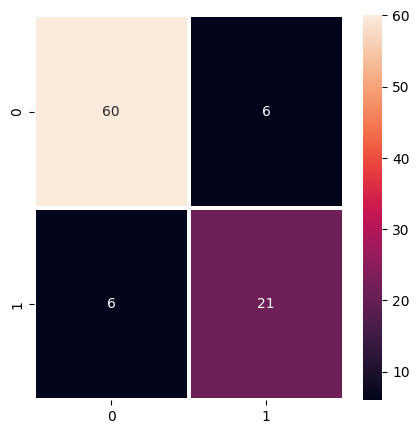

array([[60,  6],
       [ 6, 21]])

In [43]:
y_true = y_test
y_pred = rfc.predict(x_test)
plot_confusionMatrix(y_true,y_pred)

# Result

In [44]:
score_list = list(score_list.items())

In [45]:
for alg,score in score_list:
    print(f"{alg} Score is {str(score)[:4]} ")


KNN Classifier Score is 0.87 
Logistic Regression Score is 0.87 
SVC Score is 0.84 
GaussianNBC Score is 0.81 
DTC Score is 0.78 
RFC Score is 0.87 


We've saw our scores. Let's sort them.

1. Random Forest Classification 87% Accuracy
2. Naive Bayes and KNN Classification 81% Accuracy
3. Support Vector Machine Classification 80% Accuracy
4. Decision Tree Classification 78% Accuracy
5. Logistic Regression 74% Accuracy

As we can see, for classification, the best algorithm is Random Forest Classification.